## Pandas Data Cleaning II

### University of Virginia
### DS1002: Programming for Data Science
### Last Updated: October 7, 2022
### Last Reviewed: October 7, 2022
---

### PREREQUISITES
- data types
- pandas dataframes
- pandas data cleaning I

### OBJECTIVES
- Problems with text and categorical data

In [2]:
import pandas as pd
import numpy as np

## Categorical Data & Membership Constraints

- Has a predefined set of categories

- Value can only be one of the membership categories

- Often coded as numbers for further analysis techniques (like machine learning)

### Concerns in categorical data

1. Errors occur when observations have values that go beyond the predefined catogories

2. Errors also occur with inconsistent fields

3. Needing to collapse categories

4. Data type not being defined as 'category'

### Fixing observations that go beyond predefined categories

- We can drop, remap, or infer categories to fix

- We covered simple examples of these during Pandas Data Cleaning I

- Here is more complex example:

In [3]:
# import csv's

study = pd.read_csv('data/study.csv')
categories = pd.read_csv('data/blood_categories.csv')

In [4]:
study

name birthday  blood_type
0      Beth  10/20/19         B-
1      Paul    7/8/20         A-
2     Helen   8/12/19         O+
3  Jennifer   3/17/19         O-
4     Keith  12/17/19         Z+
5     Kelly   4/27/20         A+
6    Rachel   4/19/19        AB+

In [5]:
categories

blood_type
0         O-
1         O+
2         A-
3         A+
4         B+
5         B-
6        AB+
7        AB-

We can check for errors with using joins.

![](images/joins.png)

**So a left anti join between study and categories would give us this:**

![](images/antijoin.png)

**An inner join between study and category would give us:**

![](images/innerjoin.png)

**Let's do this in python**

**`.set()`**  
**`.difference()`**

[Geeks for Geeks](https://www.geeksforgeeks.org/python-set-difference/)

*Note: these are from python not pandas*

In [6]:
# find inconsistent categories

inconsistent_categories = set(study['blood_type']).difference(categories['blood_type'])
inconsistent_categories

{'Z+'}

In [7]:
# find inconsistent rows

inconsistent_rows = study['blood_type'].isin(inconsistent_categories) # gives a boolean series
study[inconsistent_rows] # subset study dataframe based on boolean values

name birthday  blood_type
4  Keith  12/17/19         Z+

In [8]:
# one way to drop inconsistent rows (other ways in pandas cleaning I)
consistent_data = study[~inconsistent_rows]
consistent_data

name birthday  blood_type
0      Beth  10/20/19         B-
1      Paul    7/8/20         A-
2     Helen   8/12/19         O+
3  Jennifer   3/17/19         O-
5     Kelly   4/27/20         A+
6    Rachel   4/19/19        AB+

### Fixing value inconsistency

In [9]:
# import `marriage_status` dataset
marriage = pd.read_csv('data/marriage_status.csv')

In [10]:
marriage.head()

marriage_status
0        divorced
1       separated
2         married
3       UNMARRIED
4         MARRIED

In [11]:
marriage['marriage_status'].value_counts()

married      6
unmarried    4
divorced     3
separated    3
UNMARRIED    3
MARRIED      2
Name: marriage_status, dtype: int64

For this example we can either capitalize or lowercase the values:

In [12]:
# Capitalize
marriage['marriage_status'] = marriage['marriage_status'].str.upper()
marriage['marriage_status'].value_counts()

MARRIED      8
UNMARRIED    7
DIVORCED     3
SEPARATED    3
Name: marriage_status, dtype: int64

In [13]:
# Lowercase
marriage['marriage_status'] = marriage['marriage_status'].str.lower()
marriage['marriage_status'].value_counts()


married      8
unmarried    7
divorced     3
separated    3
Name: marriage_status, dtype: int64

### Collapsing data into categories

* Often we will need to distill continuous data into categories 
* Categories should have evidence-based backing behing them
* Cateogires can increase interpretability but can also lose valuable information

In [14]:
income = pd.read_csv('data/income.csv')


**`.qcut()`**

* automatically divides data into categories based on the argument `q` and the distribution of data

In [15]:
group_names = ['0-100K', '100K-500K', '500K+']
income['income_group'] = pd.qcut(income['household_income'], q = 3,
                                     labels = group_names)

income[['income_group', 'household_income']]

income_group  household_income
0        0-100K             88000
1        0-100K             47000
2         500K+            155000
3         500K+            147000
4         500K+            250000
5     100K-500K            107000
6         500K+            700000
7     100K-500K            120000
8     100K-500K             90000
9        0-100K             33000
10       0-100K             55000

**`.cut()`**

* Allows you to use categories cut-off ranges with the `bins` arguement

In [16]:
ranges = [0, 100000, 500000, np.inf]
group_names = ['0-100K', '100K-500K', '500K+']
income['income_group'] = pd.cut(income['household_income'], bins = ranges,
                                     labels = group_names)

income[['income_group', 'household_income']]

income_group  household_income
0        0-100K             88000
1        0-100K             47000
2     100K-500K            155000
3     100K-500K            147000
4     100K-500K            250000
5     100K-500K            107000
6         500K+            700000
7     100K-500K            120000
8        0-100K             90000
9        0-100K             33000
10       0-100K             55000

## Map cateogories into fewer ones

In [17]:
computer = pd.read_csv('data/computer.csv')

We want to collapse the `operating system` column into `'DesktopOS', 'MobileOS'`

In [18]:
# create dictionary
mapping = {'Microsoft': 'DesktopOS', 'MacOS': 'DesktopOS', 'Linux': 'DesktopOS', 'IOS': 'MobileOS', 'Android': 'MobileOS'}

# use `.replace`
computer['operating_system_category'] = computer['operating_system'].replace(mapping)
computer['operating_system_category'].unique()

array(['DesktopOS', 'MobileOS'], dtype=object)

In [19]:
computer.head()

operating_system operating_system_category
0        Microsoft                 DesktopOS
1            MacOS                 DesktopOS
2              IOS                  MobileOS
3          Android                  MobileOS
4            Linux                 DesktopOS

## Text Data

* Common type of data

* Common text data problems are:
1) data inconsistency
2) fixed length violations
3) typos

In [22]:
phones = pd.read_csv('data/phone_numbers.csv')
phones

full_name      phone_number
0     Noelani A. Gray  001-702-397-5143
1      Myles Z. Gomez  001-329-485-0540
2        Gil B. Silva  001-195-492-2338
3  Prescott D. Hardin   +1-297-996-4904
4  Benedict G. Valdex  001-969-820-3536
5    Reece M. Andrews              4138
6      Hayfa E. Keith  001-536-175-8444
7     Hedley I. Logan  001-681-552-1823
8    Jack W. Carrillo  001-910-323-5265
9     Lionel M. Davis  001-143-119-9210

Ideally we want to remove dashes, have each phone number start with the full country code, and remove phone numbers that don't have full values listed.

In [25]:
# Replace the '+' with '00'
phones['phone_number'] = phones['phone_number'].str.replace('+', '00')
phones

/var/folders/34/m650xbf9163flyrwch0r26sm0000gq/T/ipykernel_77152/2444750803.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  phones['phone_number'] = phones['phone_number'].str.replace('+', '00')


full_name      phone_number
0     Noelani A. Gray  001-702-397-5143
1      Myles Z. Gomez  001-329-485-0540
2        Gil B. Silva  001-195-492-2338
3  Prescott D. Hardin  001-297-996-4904
4  Benedict G. Valdex  001-969-820-3536
5    Reece M. Andrews              4138
6      Hayfa E. Keith  001-536-175-8444
7     Hedley I. Logan  001-681-552-1823
8    Jack W. Carrillo  001-910-323-5265
9     Lionel M. Davis  001-143-119-9210

In [26]:
# Replace the '-' with nothing
phones['phone_number'] = phones['phone_number'].str.replace('-', '')
phones

full_name   phone_number
0     Noelani A. Gray  0017023975143
1      Myles Z. Gomez  0013294850540
2        Gil B. Silva  0011954922338
3  Prescott D. Hardin  0012979964904
4  Benedict G. Valdex  0019698203536
5    Reece M. Andrews           4138
6      Hayfa E. Keith  0015361758444
7     Hedley I. Logan  0016815521823
8    Jack W. Carrillo  0019103235265
9     Lionel M. Davis  0011431199210

In [27]:
# Replace phone numbers with lower than 10 digits to NaN
digits = phones['phone_number'].str.len() # gets the length of the each phone number
phones.loc[digits < 10, 'phone_number'] = np.nan # subset phone numbers with less than 10 digits, replace with NaN
phones

full_name   phone_number
0     Noelani A. Gray  0017023975143
1      Myles Z. Gomez  0013294850540
2        Gil B. Silva  0011954922338
3  Prescott D. Hardin  0012979964904
4  Benedict G. Valdex  0019698203536
5    Reece M. Andrews            NaN
6      Hayfa E. Keith  0015361758444
7     Hedley I. Logan  0016815521823
8    Jack W. Carrillo  0019103235265
9     Lionel M. Davis  0011431199210

In [32]:
# checking data with assert statements

# find length of each row in phone_number columns
sanity_check = phones['phone_number'].str.len()

# assert minimum phone_number lenth is 10
assert sanity_check.min() >= 10

# assert all number do not have a '+' or '-'
assert phones['phone_number'].str.contains('+|-').any() == False

In [31]:
phones

full_name   phone_number
0     Noelani A. Gray  0017023975143
1      Myles Z. Gomez  0013294850540
2        Gil B. Silva  0011954922338
3  Prescott D. Hardin  0012979964904
4  Benedict G. Valdex  0019698203536
5    Reece M. Andrews            NaN
6      Hayfa E. Keith  0015361758444
7     Hedley I. Logan  0016815521823
8    Jack W. Carrillo  0019103235265
9     Lionel M. Davis  0011431199210

### More complicated regular expression (`regex`) examples

* Regular expressions give us the ability to search for any pattern in text data, like only digits for example

* They are like control + find in your browser, but more dynamic and robust

[regex blog](https://www.analyticsvidhya.com/blog/2021/07/regular-expressions-in-python-a-beginners-guide/)

In [35]:
phones_complex = pd.read_csv('data/phone_numbers_complex.csv')
phones_complex

full_name    phone_number
0     Olga Robinson  +(01706)-25891
1       Justina Kim    +0500-571437
2    Tamekah Henson      +0800-1111
3     Miranda Solis   +07058-979063
4  Caldwell Gilliam  +(016977)-8424

In [36]:
# replace letters with nothing

phones_complex['phone_number'] = phones_complex['phone_number'].str.replace(r'\D+', '') #\D+ mean anything that is not a digit, found in regex library
phones_complex

/var/folders/34/m650xbf9163flyrwch0r26sm0000gq/T/ipykernel_77152/1983954427.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  phones_complex['phone_number'] = phones_complex['phone_number'].str.replace(r'\D+', '')


full_name phone_number
0     Olga Robinson   0170625891
1       Justina Kim   0500571437
2    Tamekah Henson     08001111
3     Miranda Solis  07058979063
4  Caldwell Gilliam   0169778424

## Data Uniformity

* We want data within columns to have the same units (temperature, weight, money)

* Or data, as as dates, to have the same format

In [38]:
temps = pd.read_csv('data/temperatures.csv')
temps.head()

date  temperature
0  2019-03-03         14.0
1  2019-03-04         15.0
2  2019-03-05         18.0
3  2019-03-06         16.0
4  2019-03-07         62.6

**Let's look at graph**

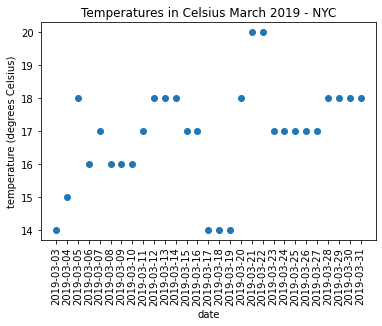

In [45]:
# import matplotlib
import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(x = 'date', y = 'temperature', data = temps)

# create title, xlabel, and ylabel
plt.title('Temperatures in Celsius March 2019 - NYC')
plt.xlabel('date')
plt.ylabel('temperature (degrees Celsius)')
plt.xticks(rotation = 90)

# show plot
plt.show()

**Convert farhenheit data to celsius**

In [41]:
temp_fah = temps.loc[temps['temperature'] > 40, 'temperature'] # use .loc to subset data above 40

temp_cels = (temp_fah - 32) * (5/9) # convert to celsius

temps.loc[temps['temperature'] > 40, 'temperature'] = temp_cels

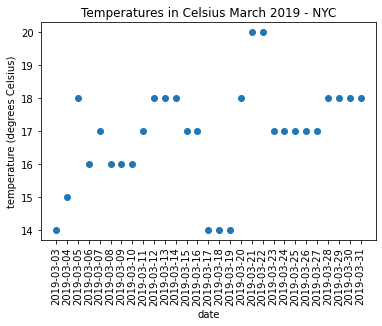

In [44]:
# import matplotlib
import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(x = 'date', y = 'temperature', data = temps)

# create title, xlabel, and ylabel
plt.title('Temperatures in Celsius March 2019 - NYC')
plt.xlabel('date')
plt.ylabel('temperature (degrees Celsius)')
plt.xticks(rotation = 90)

# show plot
plt.show()

**Clean-up Dates**

In [46]:
birthdays = pd.read_csv('data/birthdays.csv')
birthdays.head()

birth_date first_name last_name
0       27/27/2019      Rowan     Nunez
1          3/29/19      Brynn      Yang
2  March 3rd, 2019     Sophia    Reilly
3         24-03-19     Deacon    Prince
4           6/3/19   Griffith      Neal

The `datetime` package is useful for representing dates

[How to format dates in python](https://stackabuse.com/how-to-format-dates-in-python/)

We also use `pandas.to_datetime`
* can recognize more formats automatically
* sometimes fails with erroneous or unrecongizable formats

In [47]:
# converts to datetime
birthdays['birth_date'] = pd.to_datetime(birthdays['birth_date'])

DateParseError: Invalid date specified (27/27) present at position 0

**Doesn't work!**

try:

In [49]:
birthdays['birth_date'] = pd.to_datetime(birthdays['birth_date'],
                                        # attempt to infer format for each date
                                        infer_datetime_format = True,
                                        # return NA for rows where conversion failed 
                                        errors = 'coerce')

In [51]:
birthdays.head()

birth_date first_name last_name
0        NaT      Rowan     Nunez
1 2019-03-29      Brynn      Yang
2 2019-03-03     Sophia    Reilly
3 2019-03-24     Deacon    Prince
4 2019-06-03   Griffith      Neal

In [52]:
birthdays['birth_date'] = birthdays['birth_date'].dt.strftime('%d-%m-%Y')
birthdays.head()

birth_date first_name last_name
0         NaN      Rowan     Nunez
1  29-03-2019      Brynn      Yang
2  03-03-2019     Sophia    Reilly
3  24-03-2019     Deacon    Prince
4  03-06-2019   Griffith      Neal

**Ambiguous Data**

Is `2019-03-08` in August or March?

* Can covnert to `NA` or treat accordingly
* Can infer - this is where knowing your data is useful